# Evaluation

## IoU: Intersection over union  
<img src="./IoU.png"> 

In [1]:
def iou(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)
    union = (area_a + area_b - area_iou)

    return iou

In [2]:
def overlap(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
#     iou = area_iou / (area_a + area_b - area_iou)
#     union = (area_a + area_b - area_iou)

    return area_iou

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [6]:
GT = pd.read_csv('./BlueCar.csv',header=None)
GT = GT[0].str.split('\t', expand = True)
GT[0] = GT[0].astype(int)
GT[1] = GT[1].astype(int)
GT[2] = GT[2].astype(int)
GT[3] = GT[3].astype(int)
GT.head()

,0,1,2,3
0,227,207,122,99
1,240,209,123,99
2,258,215,119,95
3,265,220,115,101
4,265,231,116,100


In [7]:
gt = pd.DataFrame()
gt['x1'] = GT[0]
gt['y1'] = GT[1]
gt['x2'] = GT[2] + GT[0]
gt['y2'] = GT[3] + GT[1]
gt.head()

,x1,y1,x2,y2
0,227,207,349,306
1,240,209,363,308
2,258,215,377,310
3,265,220,380,321
4,265,231,381,331


In [13]:
gt.shape

(585, 4)

In [8]:
csrt = pd.read_csv('./csrt.csv')
kcf = pd.read_csv('./kcf.csv')
boosting = pd.read_csv('./boosting.csv')
mil = pd.read_csv('./MIL.csv')
tld = pd.read_csv('./TLD.csv')
mf = pd.read_csv('./medianflow.csv')

In [9]:
kcf.head()

,x1,y1,x2,y2
0,227,207,349,306
1,239,208,361,307
2,253,213,375,312
3,257,220,379,319
4,257,229,379,328


In [15]:
def evaluate(tracker):
    IOU = []
    OL=[]
    count = 0
    for i in range(585):
        A = np.array(tracker[i:i+1], dtype=np.float32)
        A = A[0]
        B = np.array(gt[i:i+1], dtype=np.float32)
        B = B[0]
        IoU = iou(A, B)
        ol = overlap(A, B)
        if ol == 0:
            count += 1
        
        IOU.append(IoU)
        OL.append(ol)
    
    return IOU,OL,count

In [16]:
miou = []
Rob = []

In [17]:
precision=[]
recall = []

### KCF Tracker

In [18]:
IoU_kcf = []
ol_kcf = []
count_kcf = 0
IoU_kcf,ol_kcf, count_kcf = evaluate(kcf)
time = [int(v) for v in range(585)]

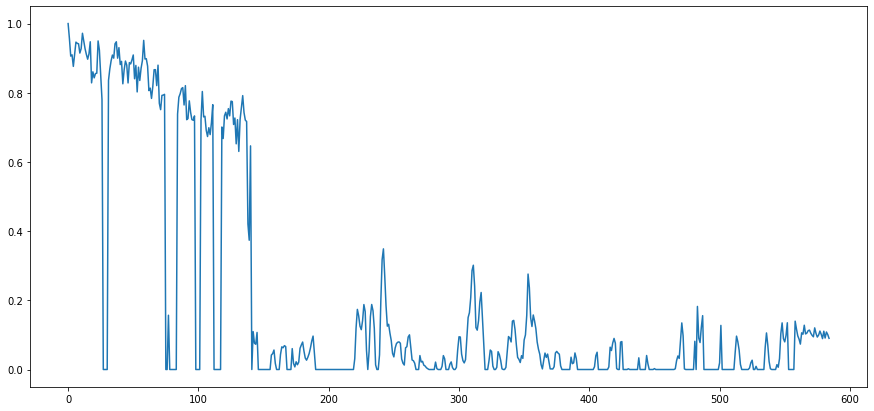

In [19]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_kcf)
plt.show()

In [20]:
rob = count_kcf / len(gt)
Rob.append(rob)
print('Robustness：',rob)
mIoU = sum(IoU_kcf) / len(gt)
miou.append(mIoU)
print('mIoU:',mIoU)

Robustness： 0.3658119658119658
mIoU: 0.19753792571445178


In [21]:
kcf.shape

(585, 4)

In [22]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_kcf[i] > 0.5:
        TP.append(IoU_kcf[i])
    
    elif IoU_kcf[i] < 0.5:
        FP.append(IoU_kcf[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / ((len(gt))-count_kcf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.19829059829059828
Precision： 0.31266846361185985


In [23]:
pre_kcf = []

In [24]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(585):
        if IoU_kcf[i] > j:
            TP.append(IoU_kcf[i])
        elif IoU_kcf[i] < j:
            FP.append(IoU_kcf[i])     
    Recall = len(TP) / (585)
    print('Recall：',Recall)
    Precision = (len(TP) / (585-count_kcf))*100
    print('Precision：', Precision)
    pre_kcf.append(Precision)

Recall： 0.6341880341880342
Precision： 100.0
Recall： 0.3282051282051282
Precision： 51.75202156334232
Recall： 0.2188034188034188
Precision： 34.50134770889488
Recall： 0.20683760683760682
Precision： 32.61455525606469
Recall： 0.2
Precision： 31.536388140161726
Recall： 0.19829059829059828
Precision： 31.266846361185983
Recall： 0.19829059829059828
Precision： 31.266846361185983
Recall： 0.18461538461538463
Precision： 29.110512129380055
Recall： 0.11623931623931624
Precision： 18.328840970350406
Recall： 0.042735042735042736
Precision： 6.738544474393531
Recall： 0.0
Precision： 0.0


### CSRT Tracker

In [27]:
IoU_csrt = []
ol_csrt = []
count_csrt = 0
IoU_csrt, ol_csrt, count_csrt = evaluate(csrt)
time = [int(v) for v in range(585)]

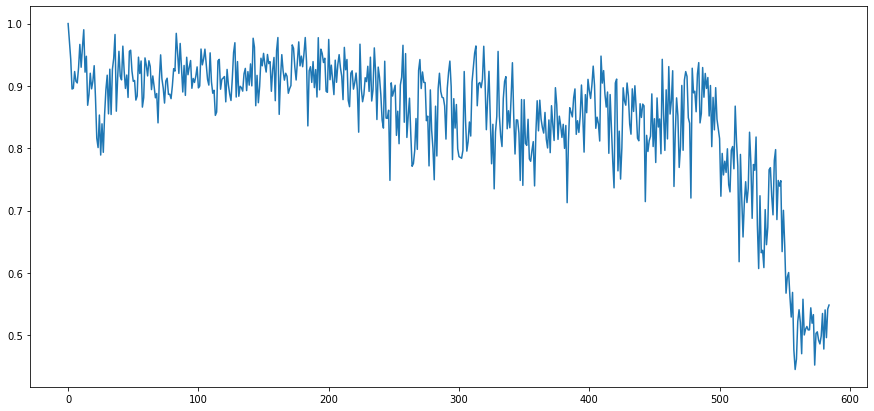

In [28]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_csrt)
plt.show()

In [29]:
rob = count_csrt / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_csrt) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.8485868166145096


In [30]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_csrt[i] > 0.5:
        TP.append(IoU_csrt[i])
    
    elif IoU_csrt[i] < 0.5:
        FP.append(IoU_csrt[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_csrt)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.9829059829059829
Precision： 0.9829059829059829


In [31]:
pre_csrt = []

In [32]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(585):
        if IoU_csrt[i] > j:
            TP.append(IoU_csrt[i])
        elif IoU_csrt[i] < j:
            FP.append(IoU_csrt[i])     
    Recall = len(TP) / (585)
    print('Recall：',Recall)
    Precision = (len(TP) / (585-count_csrt))*100
    print('Precision：', Precision)
    pre_csrt.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9829059829059829
Precision： 98.29059829059828
Recall： 0.9435897435897436
Precision： 94.35897435897435
Recall： 0.9179487179487179
Precision： 91.7948717948718
Recall： 0.788034188034188
Precision： 78.80341880341881
Recall： 0.3658119658119658
Precision： 36.58119658119658
Recall： 0.0
Precision： 0.0


### Boosting Tracker

In [33]:
IoU_b = []
ol_b = []
count_b = 0
IoU_b,ol_b, count_b = evaluate(boosting)

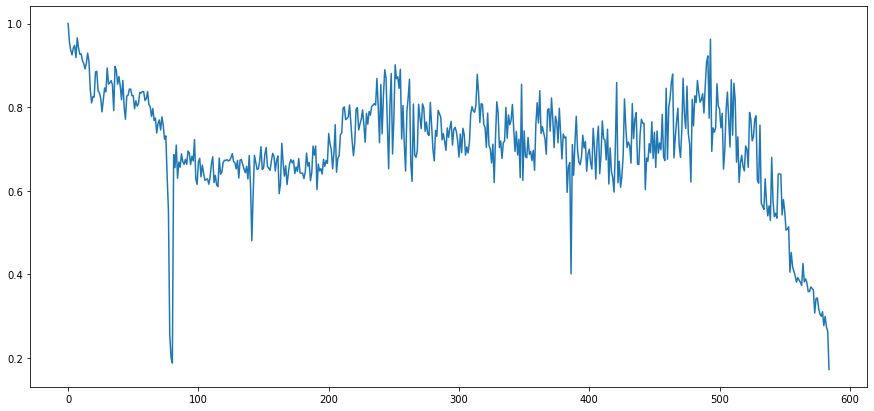

In [34]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_b)
plt.show()

In [35]:
rob = count_b / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_b) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.7073158940953067


In [36]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_b[i] > 0.5:
        TP.append(IoU_b[i])
    
    elif IoU_b[i] < 0.5:
        FP.append(IoU_b[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_b)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.9384615384615385
Precision： 0.9384615384615385


In [37]:
pre_b = []

In [38]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(585):
        if IoU_b[i] > j:
            TP.append(IoU_b[i])
        elif IoU_b[i] < j:
            FP.append(IoU_b[i])     
    Recall = len(TP) / (585)
    print('Recall：',Recall)
    Precision = (len(TP) / (585-count_b))*100
    print('Precision：', Precision)
    pre_b.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9965811965811966
Precision： 99.65811965811966
Recall： 0.9846153846153847
Precision： 98.46153846153847
Recall： 0.9504273504273504
Precision： 95.04273504273503
Recall： 0.9384615384615385
Precision： 93.84615384615384
Recall： 0.9008547008547009
Precision： 90.08547008547009
Recall： 0.5470085470085471
Precision： 54.700854700854705
Recall： 0.21367521367521367
Precision： 21.367521367521366
Recall： 0.03418803418803419
Precision： 3.418803418803419
Recall： 0.0
Precision： 0.0


### Median flow Tracker

In [39]:
IoU_mf = []
ol_mf = []
count_mf = 0
IoU_mf,ol_mf, count_mf = evaluate(mf)

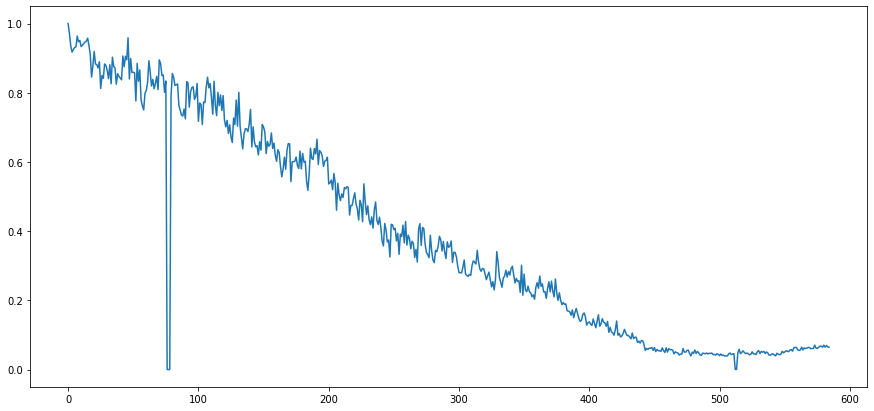

In [40]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mf)
plt.show()

In [41]:
rob = count_mf / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mf) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.008547008547008548
mIoU: 0.38890791383181883


In [42]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_mf[i] > 0.5:
        TP.append(IoU_mf[i])
    
    elif IoU_mf[i] < 0.5:
        FP.append(IoU_mf[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_mf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.3623931623931624
Precision： 0.36551724137931035


In [43]:
pre_mf = []

In [44]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(585):
        if IoU_mf[i] > j:
            TP.append(IoU_mf[i])
        elif IoU_mf[i] < j:
            FP.append(IoU_mf[i])     
    Recall = len(TP) / (585)
    print('Recall：',Recall)
    Precision = (len(TP) / (585-count_mf))*100
    print('Precision：', Precision)
    pre_mf.append(Precision)

Recall： 0.9914529914529915
Precision： 100.0
Recall： 0.7230769230769231
Precision： 72.93103448275862
Recall： 0.6410256410256411
Precision： 64.65517241379311
Recall： 0.5230769230769231
Precision： 52.758620689655174
Recall： 0.42735042735042733
Precision： 43.103448275862064
Recall： 0.3623931623931624
Precision： 36.55172413793103
Recall： 0.3128205128205128
Precision： 31.551724137931036
Recall： 0.22564102564102564
Precision： 22.758620689655174
Recall： 0.15213675213675212
Precision： 15.344827586206897
Recall： 0.039316239316239315
Precision： 3.9655172413793105
Recall： 0.0
Precision： 0.0


### MIL Tracker

In [45]:
IoU_mil = []
ol_mil = []
count_mil = 0
IoU_mil,ol_mil, count_mil = evaluate(mil)

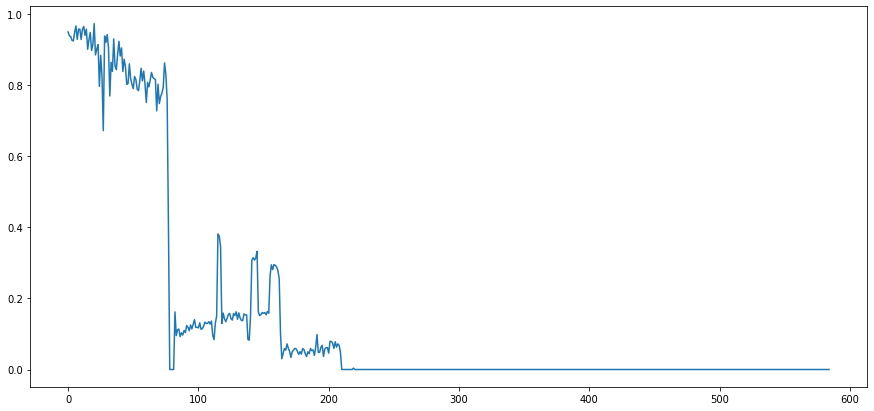

In [46]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mil)
plt.show()

In [47]:
rob = count_mil / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mil) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.6461538461538462
mIoU: 0.141723940645257


In [48]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_mil[i] > 0.5:
        TP.append(IoU_mil[i])
    
    elif IoU_mil[i] < 0.5:
        FP.append(IoU_mil[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_mil)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.13162393162393163
Precision： 0.3719806763285024


In [49]:
pre_mil = []

In [50]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(585):
        if IoU_mil[i] > j:
            TP.append(IoU_mil[i])
        elif IoU_mil[i] < j:
            FP.append(IoU_mil[i])     
    Recall = len(TP) / (585)
    print('Recall：',Recall)
    Precision = (len(TP) / (585-count_mil))*100
    print('Precision：', Precision)
    pre_mil.append(Precision)

Recall： 0.35384615384615387
Precision： 100.0
Recall： 0.26153846153846155
Precision： 73.91304347826086
Recall： 0.1606837606837607
Precision： 45.410628019323674
Recall： 0.147008547008547
Precision： 41.54589371980676
Recall： 0.13333333333333333
Precision： 37.68115942028986
Recall： 0.13162393162393163
Precision： 37.19806763285024
Recall： 0.13162393162393163
Precision： 37.19806763285024
Recall： 0.12991452991452992
Precision： 36.71497584541063
Recall： 0.1076923076923077
Precision： 30.434782608695656
Recall： 0.04957264957264957
Precision： 14.009661835748794
Recall： 0.0
Precision： 0.0


### TLD Tracker 

In [51]:
IoU_tld = []
ol_tld = []
count_tld = 0
IoU_tld,ol_tld, count_tld = evaluate(tld)

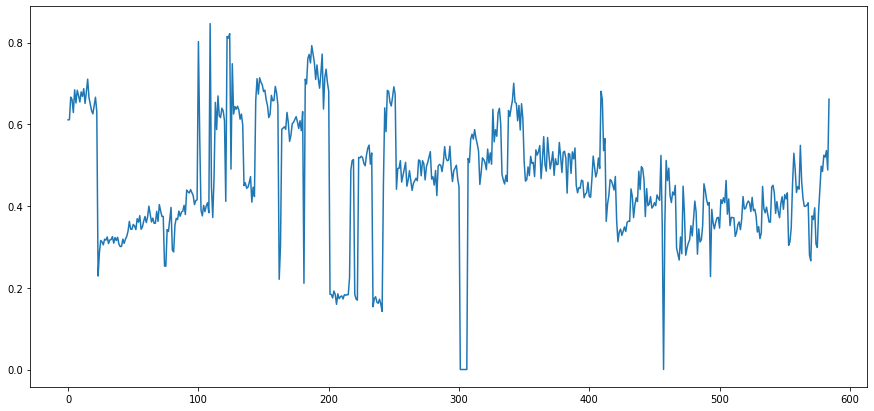

In [52]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_tld)
plt.show()

In [53]:
rob = count_tld / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_tld) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.011965811965811967
mIoU: 0.45990418740826794


In [54]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_tld[i] > 0.5:
        TP.append(IoU_tld[i])
    
    elif IoU_tld[i] < 0.5:
        FP.append(IoU_tld[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_tld)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.3658119658119658
Precision： 0.370242214532872


In [55]:
pre_tld = []

In [56]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(585):
        if IoU_tld[i] > j:
            TP.append(IoU_tld[i])
        elif IoU_tld[i] < j:
            FP.append(IoU_tld[i])     
    Recall = len(TP) / (585)
    print('Recall：',Recall)
    Precision = (len(TP) / (585-count_tld))*100
    print('Precision：', Precision)
    pre_tld.append(Precision)

Recall： 0.9880341880341881
Precision： 100.0
Recall： 0.9880341880341881
Precision： 100.0
Recall： 0.9435897435897436
Precision： 95.50173010380622
Recall： 0.9094017094017094
Precision： 92.04152249134948
Recall： 0.6632478632478632
Precision： 67.1280276816609
Recall： 0.3658119658119658
Precision： 37.0242214532872
Recall： 0.19658119658119658
Precision： 19.896193771626297
Recall： 0.044444444444444446
Precision： 4.498269896193772
Recall： 0.008547008547008548
Precision： 0.8650519031141869
Recall： 0.0
Precision： 0.0
Recall： 0.0
Precision： 0.0


## Result

In [57]:
tracker = ['kcf','csrt','boosting','medianflow','mil','tld']
result = pd.DataFrame()
result = result.assign(Tracker=tracker)
result = result.assign(Robustness = Rob)
result = result.assign(mIoU = miou)
result = result.assign(Recall = recall)
result = result.assign(Precision= precision)
result = result[['Tracker','mIoU', 'Robustness','Recall','Precision']]
result

,Tracker,mIoU,Robustness,Recall,Precision
0,kcf,0.197538,0.365812,0.198291,0.312668
1,csrt,0.848587,0.000000,0.982906,0.982906
2,boosting,0.707316,0.000000,0.938462,0.938462
3,medianflow,0.388908,0.008547,0.362393,0.365517
4,mil,0.141724,0.646154,0.131624,0.371981
5,tld,0.459904,0.011966,0.365812,0.370242


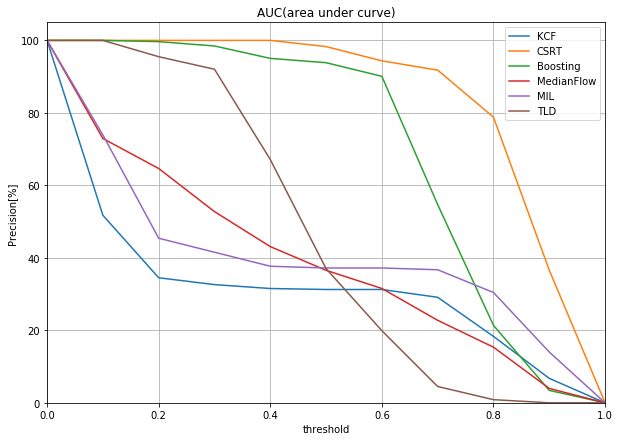

In [58]:
plt.figure(figsize=(10,7))
p1 = plt.plot(th, pre_kcf, antialiased=True)
p2 = plt.plot(th, pre_csrt, antialiased=True)
p3 = plt.plot(th, pre_b, antialiased=True)
p4 = plt.plot(th, pre_mf, antialiased=True)
p5 = plt.plot(th, pre_mil, antialiased=True)
p6 = plt.plot(th, pre_tld, antialiased=True)
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0]), ("KCF","CSRT","Boosting","MedianFlow","MIL","TLD"))
plt.grid()
plt.xlim(0.0, 1.0)
plt.ylim(0, 105)
plt.title('AUC(area under curve)')
plt.xlabel('threshold')
plt.ylabel('Precision[%]')
plt.show()